#**Desafío KNN**
**Elaborado por:**Antonella Arcos
##**Tarea**
El conjunto de datos se encuentra aquí. Tienes dos tareas principales. La primera tarea es utilizar el conjunto de datos del abulón para predecir la edad del abulón a partir de mediciones físicas utilizando KNN. Este es un problema de regresión. Es posible que desees buscar en Google "KNN regression scikit-learn". La segunda tarea es utilizar el conjunto de datos de abulón para predecir el sexo a partir de sus características. Esta debería ser una tarea más fácil, ya que ya hemos repasado la clasificación KNN usando Python

##**PREDECIR EDAD CON KNN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Para escalar datos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Para esta tarea use las siguientes fuentes:

#https://www.kaggle.com/shubh247/abalone-age-prediction/notebook
#https://dphi.tech/notebooks/191/mamun216/abalone-age-prediction

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_5/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
(4177, 9)


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.describe()
#El atributo de anillos va desde 2 hasta 29. El valor más frecuente son 10 y 11,  
#alrededor de la mediana es decir en el 2ndo y 3er cuartil.
#En este sentido la distribución puede verse como normal porque entre 10 y 11 solo hay 
#diferencia de 1.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
#Edad se calcula sumando 1.5 a los anillos
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [10]:
categorical_features = df.select_dtypes(include = [np.object]).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['Sex'], dtype='object')

In [12]:
y = df.loc[:, ['age']]

In [16]:
X = df.loc[:, ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex']]
print(X.shape)

(4177, 8)


In [17]:
X = pd.get_dummies(X)
print(X.shape)

(4177, 10)


In [18]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3132, 10)
(3132, 1)
(1045, 10)
(1045, 1)


In [19]:
error = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

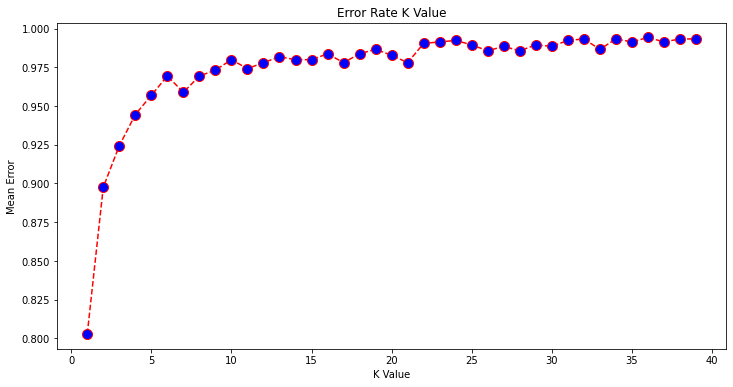

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

###**KNN para predecir la edad: regresión**

In [27]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors =5))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [28]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.6593613759478307
Testing accuracy: 0.4725628672618698


In [29]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors =3))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [30]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7132217386664322
Testing accuracy: 0.43465335753722345


###**KNN para predecir la edad: clasificación**

In [41]:
# Binarizar la columna de sex
df['Sex'] = df['Sex'].map({'M': 1, 'F': 2, 'I':3})

In [55]:
y = df.loc[:, ['Sex']]

In [56]:
Y.value_counts(dropna = False)

Sex
1      1528
3      1342
2      1307
dtype: int64

In [57]:
X = df.loc[:, ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']]

In [59]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
print(y_test.value_counts(dropna = False))
print(y_train.value_counts(dropna = False))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Sex
1      387
2      345
3      313
dtype: int64
Sex
1      1141
3      1029
2       962
dtype: int64
(3132, 8)
(3132, 1)
(1045, 8)
(1045, 1)


In [60]:
#importar el modelo de datos
from sklearn.neighbors import KNeighborsClassifier

In [67]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors =3))
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [68]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7531928480204342
Testing accuracy: 0.508133971291866


###**Después de que hayas completado las dos tareas, responde las siguientes preguntas.** 


####**¿Por qué querrías ocupar una tubería para KNN?**

Por que en Knn se debe escalar la data para su aplicacion además de que se puede querer ver como sale el modelo variando la cantidad de vecinos y correr todo el codigo cada vez que se quiera hacer eso puede ser tedioso.

####**¿Para qué otros modelos o tareas sería útil usar una tubería?**

Realmente para todos los modelos en los que se quiera ver rapidamente el ajuste de distintos hiperparametros. Por ejemplo los bosques aleatorios o arboles de decisiones. Así mismo, cuando se trabaje con bases conocidas en las que se quiera aplicar funciones especificas para su limpieza y tratamiento.